In [324]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import YGate
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer #https://docs.quantum.ibm.com/migration-guides/qiskit-1.0-features#aer
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)
from IPython.display import display

In [325]:
backend = Aer.get_backend('qasm_simulator')
backend_options = {'method': 'statevector'}

In [326]:
def run_simulation(quantum_circuit, backend_options=backend_options, noise_model=None):
    job = backend.run(quantum_circuit, run_options=backend_options, noise_model=noise_model)
    result    = job.result()
    psi_out = result.data(0)['psi_out']
    psi_out_img = psi_out.draw('latex', prefix='|\\psi_{out}> = ')
    display(psi_out_img)

# EEEN40680 Introduction to Quantum Computing Homework 8: Introduction to Qiskit
# Daniel O'Flynn 23221683 & David Forbes 21423766
# Task 1: Model the four circuits in Qiskit usign the ideal state vector simulator
## $\ket\phi^+$

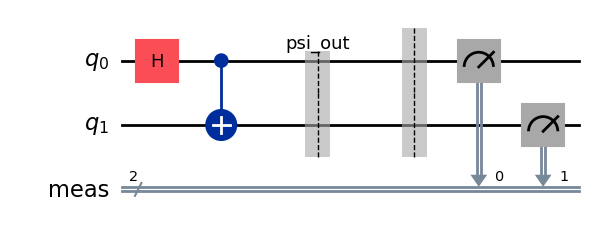

In [327]:
phi_p = QuantumCircuit(2)
# Add a Hadamard gate to qubit 0
phi_p.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
phi_p.cx(0, 1)
phi_p.save_statevector(label='psi_out')
phi_p.measure_all()
phi_p.draw("mpl")

In [328]:
run_simulation(phi_p)

<IPython.core.display.Latex object>

## $\ket\phi^-$

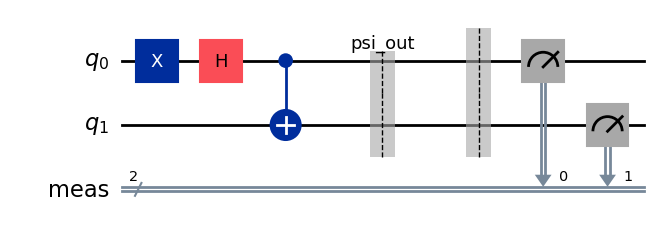

In [329]:
phi_m = QuantumCircuit(2)
# Add an X gate to qubit 0
phi_m.x(0)

# Add a Hadamard gate to qubit 0
phi_m.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
phi_m.cx(0, 1)
phi_m.save_statevector(label='psi_out')
phi_m.measure_all()
phi_m.draw("mpl")

In [330]:
run_simulation(phi_m)

<IPython.core.display.Latex object>

## $\ket\psi^+$

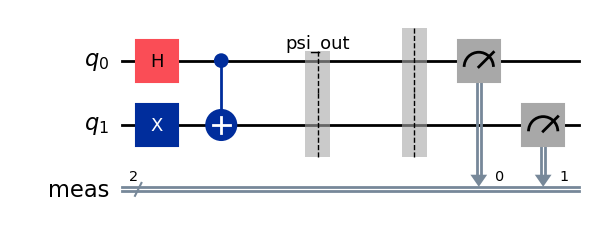

In [331]:
psi_p = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
psi_p.h(0)
 
# Add an X gate to qubit 1
psi_p.x(1)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
psi_p.cx(0, 1)
psi_p.save_statevector(label='psi_out')
psi_p.measure_all()

psi_p.draw("mpl")

In [332]:
run_simulation(psi_p)

<IPython.core.display.Latex object>

## $\ket\psi^-$

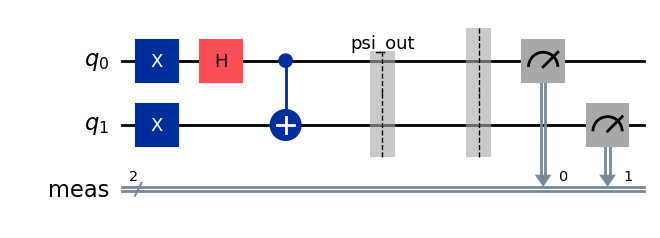

In [333]:
psi_m = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
 
# Add an X gate to qubit 0
psi_m.x(0)

# Add an X gate to qubit 1
psi_m.x(1)

# Add a H gate to qubit 0
psi_m.h(0)
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
psi_m.cx(0, 1)
psi_m.save_statevector(label='psi_out')
psi_m.measure_all()
psi_m.draw("mpl")

In [334]:
run_simulation(psi_m)

<IPython.core.display.Latex object>

## Run the simulation with noise. Is there a difference? Why?

In [335]:
noise_model = NoiseModel()
error = depolarizing_error(0.05, 1)
two_q_error = depolarizing_error(0.05, 2)
noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3', 'rz'])
noise_model.add_all_qubit_quantum_error(two_q_error, ['cx'])
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['cx', 'rz', 'u3', 'u1', 'u2']
  All-qubits errors: ['u1', 'u2', 'u3', 'rz', 'cx']


In [336]:
new_backend_options =  {'method': 'density_matrix'}


In [337]:
def noisy_vs_ideal(quantum_circuit):
    job = backend.run(quantum_circuit, run_options=new_backend_options)
    ideal_result    = job.result()
    ideal_counts    = ideal_result.get_counts()
    print("Ideal counts:", ideal_counts)
    job = backend.run(quantum_circuit, run_options=new_backend_options, noise_model=noise_model)
    noisy_result    = job.result()
    noisy_counts    = noisy_result.get_counts()
    print("Noisy counts:", noisy_counts)

In [339]:
print("Phi_p:")
noisy_vs_ideal(phi_p)
print("Phi_m:")
noisy_vs_ideal(phi_m)
print("Psi_p:")
noisy_vs_ideal(psi_p)
print("Psi_m:")
noisy_vs_ideal(psi_m)

Phi_p:
Ideal counts: {'00': 509, '11': 515}
Noisy counts: {'01': 7, '11': 488, '10': 18, '00': 511}
Phi_m:
Ideal counts: {'11': 493, '00': 531}
Noisy counts: {'01': 12, '10': 15, '00': 507, '11': 490}
Psi_p:
Ideal counts: {'01': 533, '10': 491}
Noisy counts: {'11': 10, '01': 519, '00': 17, '10': 478}
Psi_m:
Ideal counts: {'01': 518, '10': 506}
Noisy counts: {'11': 18, '00': 8, '10': 457, '01': 541}


Depolarization errors were added to 1 and 2 qubit gates. There is a clear difference between the results with and without noise. This is because the gates are sometimes randomizing the bits. WHen this happens we get a random result. This means we sometimes see states that are not at all seen in the ideal system, such as the |01> state in the Phi+ Bell state.

# Task 2 
## Model the system from HW9 part 2

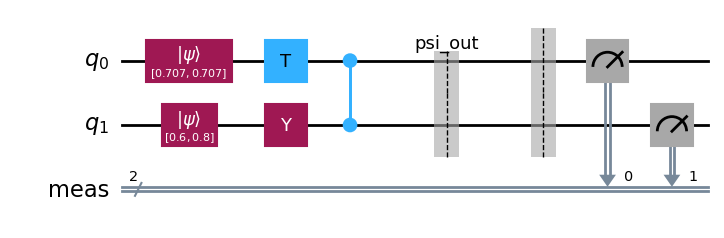

In [ ]:
qc2 = QuantumCircuit(2)

qc2.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
qc2.initialize([3/5, 4/5], 1)

qc2.t(0)
qc2.y(1)
qc2.cz(0, 1)
qc2.save_statevector(label='psi_out')
qc2.measure_all()
qc2.draw("mpl")

In [ ]:
from qiskit.quantum_info import Operator

In [340]:
psi_0 = ideal_result.data(0)['psi_out']
psi_0_img = psi_0.draw('latex', prefix='|\\psi_0> = ')
display(psi_0_img)

<IPython.core.display.Latex object>

In [345]:
print("Task 2:")
noisy_vs_ideal(qc2)

Task 2:
Ideal counts: {'11': 174, '01': 332, '10': 186, '00': 332}
Noisy counts: {'11': 187, '10': 173, '00': 352, '01': 312}
